In [ ]:
import nltk

nltk.download('all')


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39942 entries, 0 to 39941
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    39942 non-null  int64 
 1   title    39942 non-null  object
 2   text     39942 non-null  object
 3   subject  39942 non-null  object
 4   date     39942 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.5+ MB
None
   label                                              title  \
0      1  As U.S. budget fight looms, Republicans flip t...   
1      1  U.S. military to accept transgender recruits o...   
2      1  Senior U.S. Republican senator: 'Let Mr. Muell...   
3      1  FBI Russia probe helped by Australian diplomat...   
4      1  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  polit

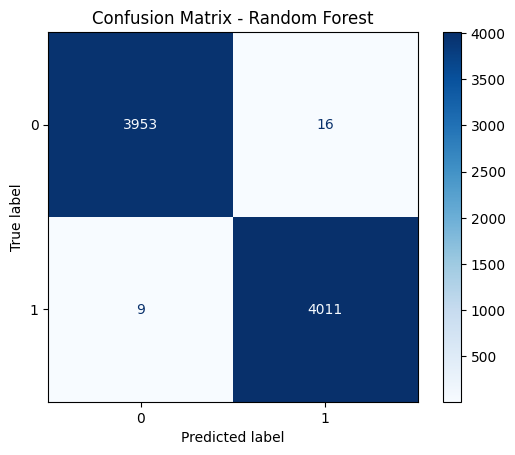

Naive Bayes Accuracy: 0.94
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      3969
           1       0.94      0.93      0.94      4020

    accuracy                           0.94      7989
   macro avg       0.94      0.94      0.94      7989
weighted avg       0.94      0.94      0.94      7989



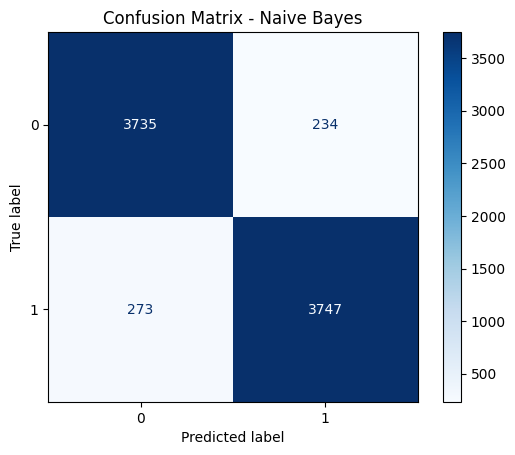

Logistic Regression Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3969
           1       0.98      0.99      0.99      4020

    accuracy                           0.99      7989
   macro avg       0.99      0.99      0.99      7989
weighted avg       0.99      0.99      0.99      7989



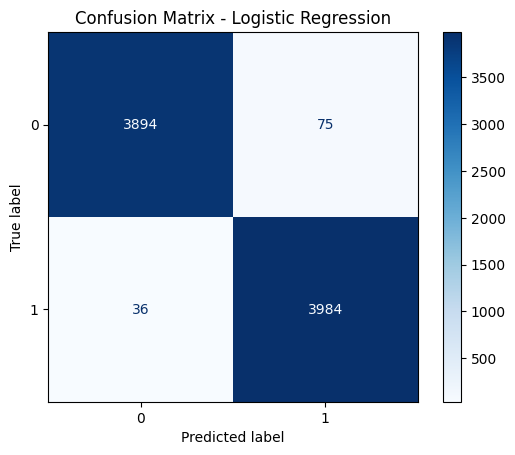

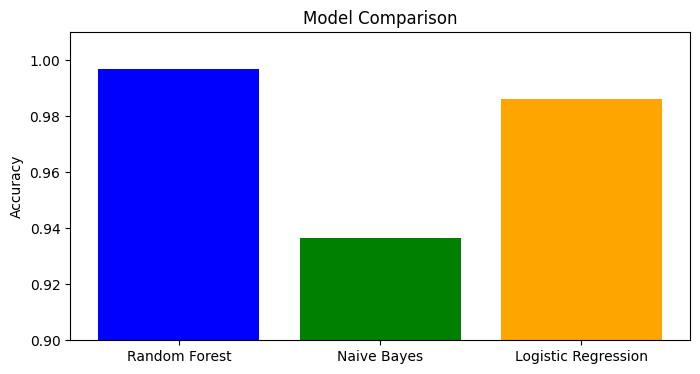

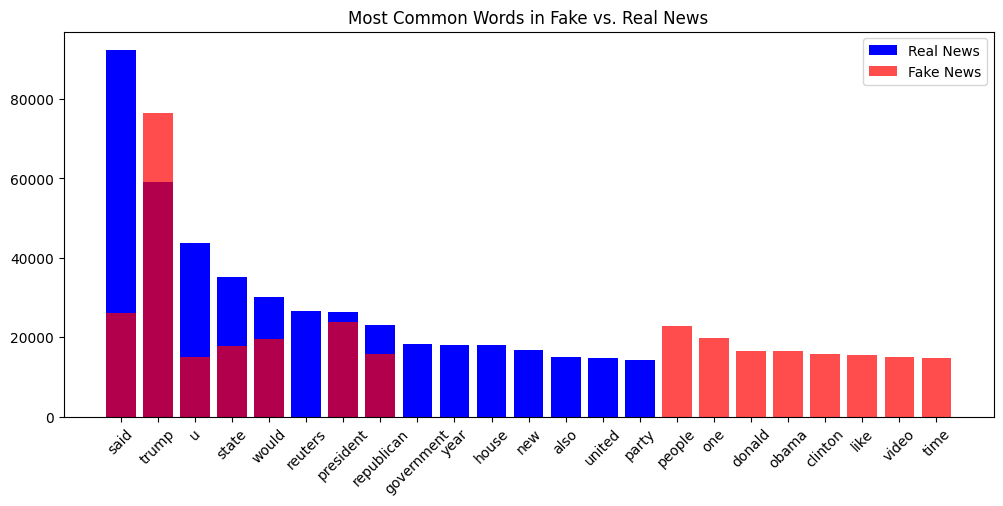

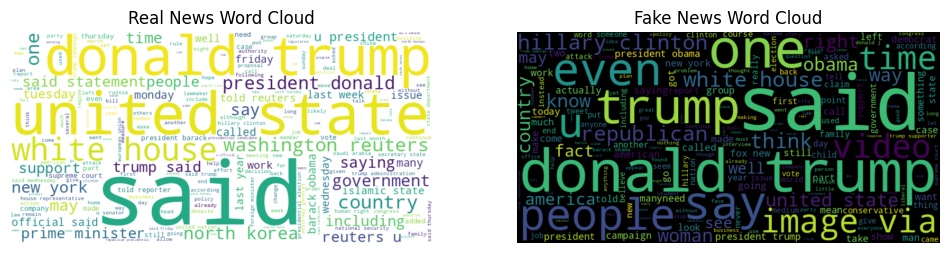

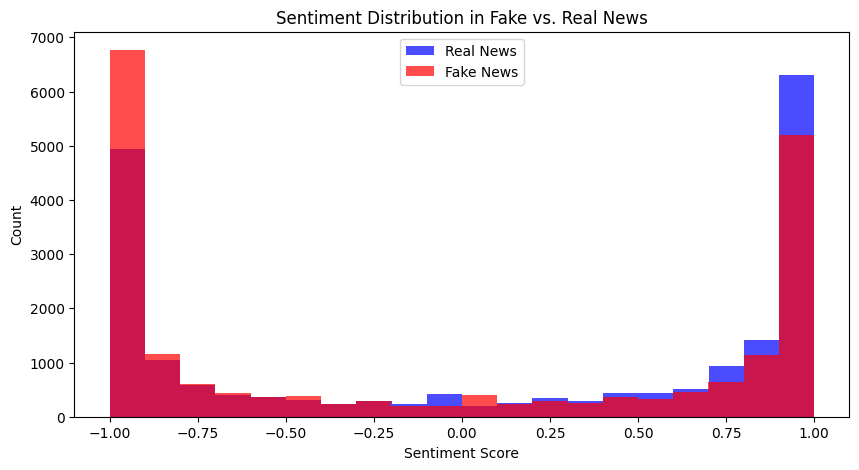

Validation data predictions saved successfully!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
import nltk
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

# Download necessary NLTK data files
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download("vader_lexicon")


# Define file paths
data_path = '/content/drive/My Drive/dataset/data.csv'
validation_path = '/content/drive/My Drive/dataset/validation_data.csv'
output_path = '/content/drive/My Drive/dataset/'

# Load dataset
df = pd.read_csv(data_path)
print(df.info())
print(df.head())

# Text Cleaning Function
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(tokens)

# Apply text cleaning
df['cleaned_text'] = (df['title'] + " " + df['text']).apply(clean_text)

# Split Data
X = df['cleaned_text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=62)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train Models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=500)
}

results = {}
for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))

    # Plot Confusion Matrix
    ConfusionMatrixDisplay.from_estimator(model, X_test_tfidf, y_test, cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.savefig(f'{output_path}{name}_confusion_matrix.png')
    plt.show()



# Plot Model Comparison
plt.figure(figsize=(8, 4))
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'orange'])
plt.title("Model Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.9, 1.01)
plt.savefig(f'{output_path}model_comparison.png')
plt.show()

# Word Frequency Analysis
real_words = " ".join(df[df['label'] == 1]['cleaned_text']).split()
fake_words = " ".join(df[df['label'] == 0]['cleaned_text']).split()
real_counts = Counter(real_words).most_common(15)
fake_counts = Counter(fake_words).most_common(15)

plt.figure(figsize=(12, 5))
plt.bar(*zip(*real_counts), color='blue', label='Real News')
plt.bar(*zip(*fake_counts), color='red', alpha=0.7, label='Fake News')
plt.xticks(rotation=45)
plt.title('Most Common Words in Fake vs. Real News')
plt.legend()
plt.savefig(f'{output_path}word_frequency.png')
plt.show()

# Word Clouds
real_wc = WordCloud(width=800, height=400, background_color="white").generate(" ".join(real_words))
fake_wc = WordCloud(width=800, height=400, background_color="black").generate(" ".join(fake_words))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(real_wc, interpolation="bilinear")
plt.axis("off")
plt.title("Real News Word Cloud")

plt.subplot(1, 2, 2)
plt.imshow(fake_wc, interpolation="bilinear")
plt.axis("off")
plt.title("Fake News Word Cloud")

plt.savefig(f'{output_path}word_clouds.png')
plt.show()

# Sentiment Analysis
sia = SentimentIntensityAnalyzer()
df["sentiment"] = df["cleaned_text"].apply(lambda text: sia.polarity_scores(text)["compound"])

plt.figure(figsize=(10, 5))
plt.hist(df[df["label"] == 1]["sentiment"], bins=20, alpha=0.7, label="Real News", color="blue")
plt.hist(df[df["label"] == 0]["sentiment"], bins=20, alpha=0.7, label="Fake News", color="red")
plt.title("Sentiment Distribution in Fake vs. Real News")
plt.xlabel("Sentiment Score")
plt.ylabel("Count")
plt.legend()
plt.savefig(f'{output_path}sentiment_distribution.png')
plt.show()

# Validation Data Prediction
val_df = pd.read_csv(validation_path)
val_df['cleaned_text'] = (val_df['title'] + " " + val_df['text']).apply(clean_text)
X_val_tfidf = vectorizer.transform(val_df['cleaned_text'])
val_df['label'] = models["Random Forest"].predict(X_val_tfidf)
val_df.to_csv(f'{output_path}validation_predictions.csv', index=False)
print("Validation data predictions saved successfully!")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
